# Introduction to Natural Language Processing

**Objectives**:


- Understand the Bag Of Words representation of Text
- Use `scikitlearn` to Vectorize text
- Build Classification Models incorporating text using `scikitlearn`
- Understand the difference between `CountVectorizer` and `TfidfVectorizer`

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
yelp = pd.read_csv('data/yelp.csv')

In [133]:
#examine the data
yelp.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [134]:
#review is X
X = yelp['text']

In [135]:
X.size

10000

In [136]:
#ratings are y
y = yelp['stars']

In [137]:
y

0       5
1       5
2       4
3       5
4       5
       ..
9995    3
9996    4
9997    4
9998    2
9999    5
Name: stars, Length: 10000, dtype: int64

In [138]:
print(X[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


### Building a Classifier with Text

> *The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.* -- Wikipedia

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

In [140]:
#instantiate the CountVectorizer
cvect = CountVectorizer()

In [141]:
#Transform the text
X_vect = cvect.fit_transform(X)

In [142]:
#What are we working with here?
X_vect

<10000x29185 sparse matrix of type '<class 'numpy.int64'>'
	with 827105 stored elements in Compressed Sparse Row format>

In [143]:
X.head(2)

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
Name: text, dtype: object

In [144]:
#make it a dataframe
dtm_df = pd.DataFrame(X_vect.toarray(), columns=cvect.get_feature_names_out())

In [145]:
#examine
dtm_df.head(2)

,00,000,007,00a,00am,00pm,01,02,03,03342,...,zuzus,zweigel,zwiebel,zy,zzed,zzzzzzzzzzzzzzzzz,éclairs,école,ém,òc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X_example = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [147]:
X_example.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [148]:
dtm_df.columns

Index(['00', '000', '007', '00a', '00am', '00pm', '01', '02', '03', '03342',
       ...
       'zuzus', 'zweigel', 'zwiebel', 'zy', 'zzed', 'zzzzzzzzzzzzzzzzz',
       'éclairs', 'école', 'ém', 'òc'],
      dtype='object', length=29185)

In [149]:
pd.DataFrame(dtm_df.sum().nlargest(10))

,0
the,66885
and,43911
to,30304
of,20932
it,20910
was,20013
is,17311
for,15337
in,14990
that,12694


In [150]:
#Find the Most Frequently Occurring Words
dtm_df.sum().nlargest(10)

the     66885
and     43911
to      30304
of      20932
it      20910
was     20013
is      17311
for     15337
in      14990
that    12694
dtype: int64

### Stopwords

Any group of words can be chosen as the stop words for a given purpose. For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on. In this case, stop words can cause problems when searching for phrases that include them, particularly in names such as "The Who", "The The", or "Take That". -- [*Wikipedia*](https://en.wikipedia.org/wiki/Stop_word)


------

In [151]:
#another instance of count vectorizer
cvect_nostop = CountVectorizer(stop_words='english')

In [152]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [153]:
stopwords = ['steve', 'bigdog']

In [154]:
[token for token in X[0].split() if token not in stopwords]

['My',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'was',
 'excellent.',
 'The',
 'weather',
 'was',
 'perfect',
 'which',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'their',
 'grounds',
 'an',
 'absolute',
 'pleasure.',
 'Our',
 'waitress',
 'was',
 'excellent',
 'and',
 'our',
 'food',
 'arrived',
 'quickly',
 'on',
 'the',
 'semi-busy',
 'Saturday',
 'morning.',
 'It',
 'looked',
 'like',
 'the',
 'place',
 'fills',
 'up',
 'pretty',
 'quickly',
 'so',
 'the',
 'earlier',
 'you',
 'get',
 'here',
 'the',
 'better.',
 'Do',
 'yourself',
 'a',
 'favor',
 'and',
 'get',
 'their',
 'Bloody',
 'Mary.',
 'It',
 'was',
 'phenomenal',
 'and',
 'simply',
 'the',
 'best',
 "I've",
 'ever',
 'had.',
 "I'm",
 'pretty',
 'sure',
 'they',
 'only',
 'use',
 'ingredients',
 'from',
 'their',
 'garden',
 'and',
 'blend',
 'them',
 'fresh',
 'when',
 'you',
 'order',
 'it.',
 'It',
 'was',
 'amazing.',
 'While',
 'EVERYTHING',
 'on',
 'the

In [155]:
#fit it
X_no_stop = cvect_nostop.fit_transform(X)

In [156]:
stops = cvect_nostop.get_stop_words()

In [157]:
stops

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [158]:
stop_set = set(stops)

In [159]:
stop_set.add('steve')

In [160]:
cvect = CountVectorizer(stop_words=stop_set)

In [161]:
#examine the words again
dtm_df_nostop = pd.DataFrame(X_no_stop.toarray(), columns = cvect_nostop.get_feature_names_out())

In [162]:
dtm_df_nostop.sum().nlargest(20)

good          6801
place         6662
food          6184
great         5127
like          5041
just          4567
time          3504
really        3366
service       3169
ve            2594
don           2518
love          2250
little        2221
nice          2217
best          1952
got           1831
pretty        1812
restaurant    1750
chicken       1746
try           1721
dtype: int64

In [163]:
#how about general shape
dtm_df_nostop.shape # 28,880 words

(10000, 28880)

In [164]:
#function for top words given X_vect, vectorizer
dtm_df_nostop.sum().nsmallest(10)

007       1
00a       1
03        1
03342     1
1000x     1
1001      1
100lbs    1
102       1
102729    1
104       1
dtype: int64

### Limiting Features

Not all the words might matter, and we can start being selective by only using frequently occuring words.  

In [165]:
#limit features to 50 with stopwords removed
cvect_nostop_50features = CountVectorizer(stop_words='english', max_features=50)

In [166]:
#Fit and transform
X_50 = cvect_nostop_50features.fit_transform(X)

In [167]:
X_50.toarray()

array([[0, 2, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 3, 0, ..., 0, 0, 0],
       [3, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [168]:
#examine the results
pd.DataFrame(X_50.toarray(), columns=cvect_nostop_50features.get_feature_names_out())

,bar,best,better,came,cheese,chicken,come,day,delicious,did,...,say,service,staff,think,time,try,ve,want,way,went
0,0,2,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,0
1,0,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
9996,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,1,0
9997,0,3,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
9998,3,0,1,0,0,0,1,0,0,1,...,0,0,2,1,0,0,0,0,0,0


In [169]:
### BUILD A CLASSIFIER QUICKLY

In [170]:
from sklearn.linear_model import LogisticRegression

In [171]:
#instantiate
clf = LogisticRegression()

In [172]:
clf.fit(X_50, y)

LogisticRegression()

In [173]:
clf.score(X_50, y)

0.4516

In [174]:
cvect_nostop_50features.get_feature_names_out()

array(['bar', 'best', 'better', 'came', 'cheese', 'chicken', 'come',
       'day', 'delicious', 'did', 'didn', 'don', 'food', 'fresh',
       'friendly', 'going', 'good', 'got', 'great', 'just', 'know',
       'like', 'little', 'love', 'lunch', 'make', 'menu', 'new', 'nice',
       'night', 'order', 'ordered', 'people', 'pizza', 'place', 'pretty',
       'really', 'restaurant', 'right', 'salad', 'say', 'service',
       'staff', 'think', 'time', 'try', 've', 'want', 'way', 'went'],
      dtype=object)

In [175]:
clf.predict(X_50)

array([5, 3, 5, ..., 5, 1, 4])

In [176]:
y.value_counts(normalize = True)

stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64

### N-Grams

Alternatively, we may want to consider a larger unit of text. A *bigram* would be each pair of words, a *trigram* each triplet and so on.  We can specify a range for these in the `CountVectorizer`. 

In [177]:
#ngram range argument
cvect_ngram = CountVectorizer(stop_words='english', ngram_range=(2,3))

In [178]:
#fit and transform
X_ngrams = cvect_ngram.fit_transform(X)

In [179]:
#check it out
pd.DataFrame(X_ngrams.toarray(), columns = cvect_ngram.get_feature_names_out()).head()

,00 00,00 00 credit,00 00 roys,00 00 sandwich,00 12,00 12 month,00 15,00 15 different,00 20,00 20 minute,...,zzed pants,zzed pants really,éclairs napoleons,éclairs napoleons new,école lenôtre,école lenôtre trained,ém huge,ém huge ended,òc châm,òc châm sweet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
stuff = ['this is a simple example full of fun things']

In [181]:
xs = cvect_ngram.fit_transform(stuff)

In [182]:
pd.DataFrame(xs.toarray(), columns = cvect_ngram.get_feature_names_out())

,example fun,example fun things,fun things,simple example,simple example fun
0,1,1,1,1,1


### Building a Model

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [185]:
#instantiate regressor 
clf = LogisticRegression()

In [186]:
#x and y based on y > 3 in ratings
y_3 = y[y > 3]

In [187]:
X_3 = X[y_3.index]

In [188]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3)

In [189]:
#make a pipeline
nlp_pipe = Pipeline(
    steps=[
        ('cvect', CountVectorizer(stop_words='english', max_features=500)),
        ('clf', clf)
    ]
)

In [190]:
#fit the pipe
nlp_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvect',
                 CountVectorizer(max_features=500, stop_words='english')),
                ('clf', LogisticRegression())])

In [191]:
#score the model
nlp_pipe.score(X_test, y_test)

0.6351981351981352

In [192]:
y_train.value_counts(normalize = True)

stars
4    0.513892
5    0.486108
Name: proportion, dtype: float64

In [193]:
#look at coefs
coefs = nlp_pipe.named_steps['clf'].coef_
coefs

array([[-1.11819973e-01,  3.69297391e-01,  1.50337652e-01,
         1.36869753e-01, -5.58764814e-02,  7.13686599e-01,
         4.78558605e-01,  3.78301597e-02, -1.14997094e-01,
         6.31994141e-02,  5.62867246e-01,  2.41957494e-01,
         3.40168460e-01, -1.29566279e-01,  5.47088803e-02,
         1.10454616e-01,  3.12183850e-01,  2.12287629e-01,
        -8.91804011e-02, -3.28194929e-01, -1.46028131e-01,
        -1.29001397e-01,  5.54063968e-02, -2.11160098e-01,
         4.27249976e-02,  3.15885973e-01,  1.08586929e-01,
         1.70100728e-01, -4.26003426e-01, -9.74779358e-02,
         1.43293827e-01, -1.86811808e-01,  3.60317719e-01,
        -1.11015014e-01, -8.51148247e-02, -1.29176422e-01,
         1.90394795e-01,  5.60934272e-01, -1.23672202e-01,
         7.75331931e-02,  3.53531287e-01, -2.91141490e-01,
        -3.27438962e-02,  5.35618922e-01,  2.86246871e-01,
         2.94104732e-01,  1.60077980e-01, -1.53553566e-01,
        -1.68735543e-01,  1.69263830e-01, -7.21057969e-0

In [194]:
#put them in dataframe with words
words = nlp_pipe.named_steps['cvect'].get_feature_names_out()

df = pd.DataFrame({'coefs': coefs[0], 'words': words}) # Note:Coeff for which class --> since it was 4/5, it is 

df.head(10)

,coefs,words
0,-0.111820,10
1,0.369297,15
2,0.150338,20
3,0.136870,30
4,-0.055876,50
5,0.713687,able
6,0.478559,absolutely
7,0.037830,actually
8,-0.114997,add
9,0.063199,ago


<Axes: ylabel='words'>

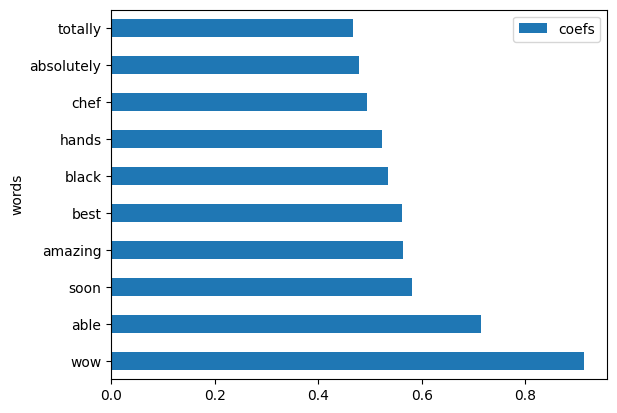

In [195]:
#examine a plot of ten largest
df.nlargest(10, 'coefs').plot(kind='barh', x='words', y='coefs')

<BarContainer object of 10 artists>

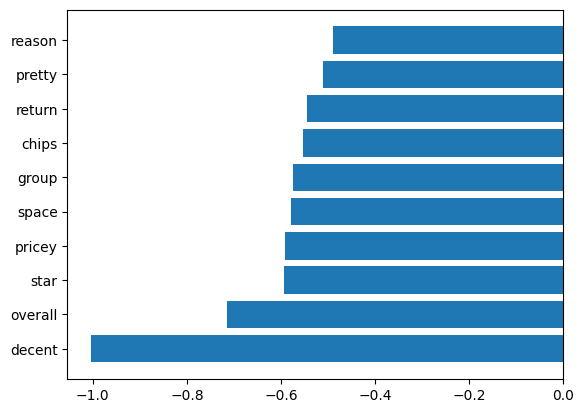

In [208]:
#ten smallest
smallest = df.nsmallest(10, 'coefs')
plt.barh(smallest['words'], smallest['coefs'])

### Practice



We will review the basic NLP techniques we've learned to create a sentiment analyzer from Rotten Tomatoes Movie review. The data is from [Kaggle](https://www.kaggle.com/c/word2vec-nlp-tutorial#part-1-for-beginners-bag-of-words).

In [209]:
import pandas as pd       
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Read in training data.
train = pd.read_csv("./data/labeledTrainData.tsv",
                    header=0,
                    delimiter="\t",
                    quoting=3)

In [210]:
# Read in testing data.
test = pd.read_csv("./data/testData.tsv",
                   header=0, 
                   delimiter="\t",
                   quoting=3)

----


1. Setup a pipeline to inject the `CountVectorizer` and a `LogisticRegression` estimator.
2. Fit and score the model with no hyperparameter adjustment.  Discuss the results compared to a null model.
3. Remove stopwords and limit the features to 500.  Is there a significant difference in performance here?  Is accuracy the right metric?
4. Grid Search some different versions of the `CountVectorizer` and identify the best estimator.
5. Investigate coefficients; what do they mean?  
6. Redo the classifier using one hot encoding (*`CountVectorizer(binary = True)`* scaling (*use large `C` value*).  Discuss the effect of a review containing the word Segal.


<center>
  <img src = https://media2.giphy.com/media/EjFx0jioOoMZq/200w.webp?cid=ecf05e47kczth944y55zjb1xp6efz0rj389ojd840mnrom6y&rid=200w.webp />
 </center>

In [211]:
train.head(2)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."


In [212]:
test.head(2)

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."


In [213]:
X_train, X_val, y_train, y_val = train_test_split(train['review'], train['sentiment'], test_size=0.2, random_state=31)

In [215]:
# 1. Setup a pipline to inject CountVectorizer and LogisticRegression

pipe = Pipeline(
    steps=[
        ('cvect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter = 1000))
    ]
)

pipe.fit(X_train, y_train)

print(f'Train Score: {pipe.score(X_train, y_train)}')
print(f'Validation Score: {pipe.score(X_val, y_val)}')
print(f'Null Accuracy: {y_train.value_counts(normalize=True).max()}')

Train Score: 0.9989
Validation Score: 0.8852
Null Accuracy: 0.50205


In [216]:
pipe2 = Pipeline(
    steps=[
        ('cvect', CountVectorizer(stop_words='english', max_features=500)),
        ('clf', LogisticRegression(max_iter = 1000))
    ]
)

pipe2.fit(X_train, y_train)

print(f'Train Score: {pipe2.score(X_train, y_train)}')
print(f'Validation Score: {pipe2.score(X_val, y_val)}')
print(f'Null Accuracy: {y_train.value_counts(normalize=True).max()}')

Train Score: 0.8459
Validation Score: 0.8304
Null Accuracy: 0.50205


In [217]:
from sklearn.model_selection import GridSearchCV

pipe3 = Pipeline(
    steps=[
        ('cvect', CountVectorizer()),
        ('clf', LogisticRegression(max_iter = 1000))
    ]
)

grid_params = {
    'cvect__max_features': [100, 500, 1000, 5000],
    'cvect__stop_words': ['english', None],
    'cvect__ngram_range': [(1, 1), (1, 2), (1, 3)]
}


grid = GridSearchCV(pipe3, param_grid=grid_params, cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print(f'Best Params: {grid.best_params_}')
print(f'Train Score: {grid.score(X_train, y_train)}')
print(f'Validation Score: {grid.score(X_val, y_val)}')
print(f'Null Accuracy: {y_train.value_counts(normalize=True).max()}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params: {'cvect__max_features': 5000, 'cvect__ngram_range': (1, 1), 'cvect__stop_words': None}
Train Score: 0.9761
Validation Score: 0.8614
Null Accuracy: 0.50205


In [126]:
print(f'Best Params: {grid.best_params_}')

Best Params: {'cvect__max_features': 5000, 'cvect__ngram_range': (1, 1), 'cvect__stop_words': None}


In [219]:
best_model = grid.best_estimator_

In [220]:
coefs = best_model.named_steps['clf'].coef_
words = best_model.named_steps['cvect'].get_feature_names_out()

df = pd.DataFrame({'coefs': coefs[0], 'words': words})

<Axes: ylabel='words'>

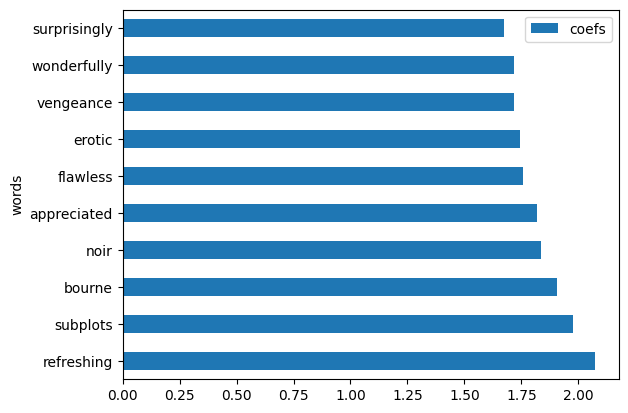

In [221]:
# plot the top 10 words
df.nlargest(10, 'coefs').plot(kind='barh', x='words', y='coefs')

<Axes: ylabel='words'>

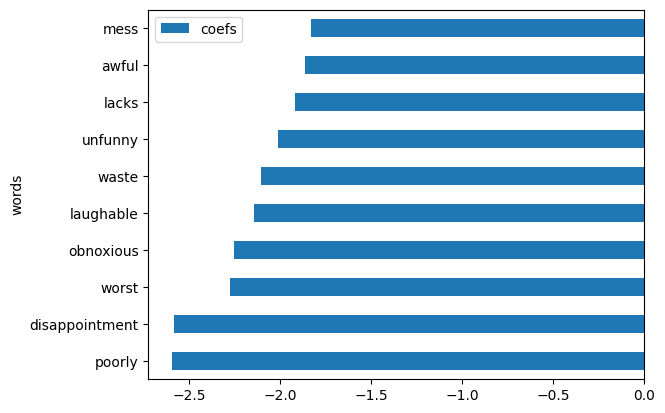

In [222]:
df.nsmallest(10, 'coefs').plot(kind='barh', x='words', y='coefs')

In [134]:
pipe4 = Pipeline(
    steps=[
        ('cvect', CountVectorizer(binary=True)),
        ('clf', LogisticRegression(C=1000))
    ]
)

pipe4.fit(X_train, y_train)

print(f'Train Score: {pipe4.score(X_train, y_train)}')
print(f'Validation Score: {pipe4.score(X_val, y_val)}')
print(f'Null Accuracy: {y_train.value_counts(normalize=True).max()}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score: 1.0
Validation Score: 0.8682
Null Accuracy: 0.50205


In [140]:
# find coefient value of Segal

coefs = pipe4.named_steps['clf'].coef_
words = pipe4.named_steps['cvect'].get_feature_names_out()

df = pd.DataFrame({'coefs': coefs[0], 'words': words})

segal = df.loc[df['words'] == 'segal']


segal

,coefs,words
53641,-1.348403,segal
